In [1]:
#importing necessary libraries

import json
import pandas as pd
import numpy as np
import collections, re

#NLP libraries
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS

#for visualization
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

# Importing Mandarin Chinese SMS Data

In [2]:
with open('Mandarin.json', encoding="utf8") as f:
    data = json.load(f)


In [3]:
type(data)


dict

In [4]:
listofDict = data['smsCorpus']['message']

In [5]:
listofDict[0]

{'@id': 1,
 'collectionMethod': {'@collector': 'Tao Chen',
  '@method': 'Web-based Transcription',
  '@time': '2010/11'},
 'destination': {'@country': 'unknown', 'destNumber': {'$': 'unknown'}},
 'messageProfile': {'@language': 'zh', '@time': 'unknown', '@type': 'send'},
 'source': {'phoneModel': {'@manufactuer': 'Sony Ericsson',
   '@smartphone': 'unknown'},
  'srcNumber': {'$': '06bb204a4e5da882f6d1d28340cd62ec'},
  'userProfile': {'age': {'$': 'unknown'},
   'city': {'$': 'unknown'},
   'country': {'$': 'unknown'},
   'experience': {'$': '5 to 10 years'},
   'frequency': {'$': 'Less than 1 SMS daily'},
   'gender': {'$': 'unknown'},
   'inputMethod': {'$': 'Bihua'},
   'nativeSpeaker': {'$': 'yes'},
   'userID': {'$': '06bb204a4e5da882f6d1d28340cd62ec'}}},
 'text': {'$': '老師,媽咪話想買盒月餅比你,你要傳統定冰皮?'}}

In [6]:
fullData = pd.DataFrame(listofDict)

In [7]:
smsData = fullData[['@id','text']]

In [8]:
smsData = pd.DataFrame(smsData)
smsData = smsData.astype('str')
smsData.head()


,@id,text
0,1,"{'$': '老師,媽咪話想買盒月餅比你,你要傳統定冰皮?'}"
1,2,{'$': '你幾時返黎教我填份表?我過幾日就要走喇!'}
2,3,{'$': '今晚肥不肥家吃饭 如果要 提前半小时跟我缩一下'}
3,4,{'$': '周六要通宵打麻将 带点吃的喝的来'}
4,5,{'$': '我正在休息。明天有考试'}


# Barplot of most used phone Model

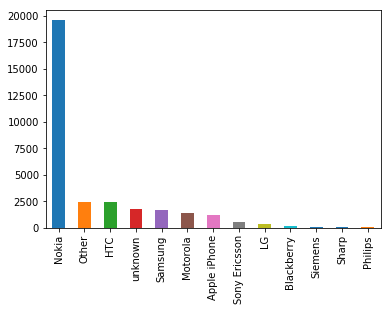

In [9]:
phoneModel = []
res2 = fullData['source']

for res3 in res2[:len(fullData['source'])]:
    phoneModel.append(res3['phoneModel']['@manufactuer'])
    
phoneModel = pd.DataFrame(phoneModel, columns=['model']) 
phoneModel['model'].value_counts().plot(kind='bar')

# Translating text messages to English

In [10]:
#detecting the language of text messages using TextBlob
from textblob import TextBlob

b = TextBlob('今晚肥不肥家吃饭 如果要 提前半小时跟我缩一下')
b.detect_language()

'zh-CN'

In [13]:
#translating Mandarin Chinese texts to English
smsData['text'] = smsData['text'][:100].apply(lambda x: str(TextBlob(x).translate(to='en')))

In [14]:
smsData.head()

,@id,text
0,1,"{'$': 'Teacher, Mummy wants to buy a box of mo..."
1,2,{'$': 'When did you return to Lebanon to teach...
2,3,{'$': 'Tonight's fat is not a family meal if y...
3,4,{'$': 'Stop Saturday night to play mahjong wit...
4,5,{'$': 'I'm resting. There will be an exam tomo...


Word Count

Count of words in each text message

In [15]:
smsData['word_count'] = smsData['text'].apply(lambda x: len(str(x).split(" ")))
smsData[['text','word_count']].head()

,text,word_count
0,"{'$': 'Teacher, Mummy wants to buy a box of mo...",22
1,{'$': 'When did you return to Lebanon to teach...,23
2,{'$': 'Tonight's fat is not a family meal if y...,19
3,{'$': 'Stop Saturday night to play mahjong wit...,13
4,{'$': 'I'm resting. There will be an exam tomo...,9


Average Word Count

In [16]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

smsData['avg_word'] = smsData['text'].apply(lambda x: avg_word(str(x)))
smsData[['text','avg_word']].head()


,text,avg_word
0,"{'$': 'Teacher, Mummy wants to buy a box of mo...",4.090909
1,{'$': 'When did you return to Lebanon to teach...,3.608696
2,{'$': 'Tonight's fat is not a family meal if y...,4.000000
3,{'$': 'Stop Saturday night to play mahjong wit...,4.923077
4,{'$': 'I'm resting. There will be an exam tomo...,4.666667


Number of stop words

In [17]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

smsData['stopwords'] = smsData['text'].apply(lambda x: len([x for x in str(x).split() if x in stop]))
smsData[['text','stopwords']].head()

,text,stopwords
0,"{'$': 'Teacher, Mummy wants to buy a box of mo...",8
1,{'$': 'When did you return to Lebanon to teach...,13
2,{'$': 'Tonight's fat is not a family meal if y...,9
3,{'$': 'Stop Saturday night to play mahjong wit...,4
4,{'$': 'I'm resting. There will be an exam tomo...,3


Number of uppercase words

In [18]:
smsData['upper'] = smsData['text'].apply(lambda x: len([x for x in str(x).split() if x.isupper()]))
smsData[['text','upper']].head()

,text,upper
0,"{'$': 'Teacher, Mummy wants to buy a box of mo...",0
1,{'$': 'When did you return to Lebanon to teach...,1
2,{'$': 'Tonight's fat is not a family meal if y...,0
3,{'$': 'Stop Saturday night to play mahjong wit...,0
4,{'$': 'I'm resting. There will be an exam tomo...,0


# Text Pre Processing

# Converting to Lowercase

In [19]:
smsData['text'] = smsData['text'].apply(lambda x: " ".join(str(x).lower() for x in str(x).split()))
smsData['text'].head()

0    {'$': 'teacher, mummy wants to buy a box of mo...
1    {'$': 'when did you return to lebanon to teach...
2    {'$': 'tonight's fat is not a family meal if y...
3    {'$': 'stop saturday night to play mahjong wit...
4    {'$': 'i'm resting. there will be an exam tomo...
Name: text, dtype: object

In [21]:
#No. of upper case words in text messages
smsData['upper'] = smsData['text'].apply(lambda x: len([x for x in str(x).split() if x.isupper()]))
smsData[['text','upper']].head()

,text,upper
0,"{'$': 'teacher, mummy wants to buy a box of mo...",0
1,{'$': 'when did you return to lebanon to teach...,0
2,{'$': 'tonight's fat is not a family meal if y...,0
3,{'$': 'stop saturday night to play mahjong wit...,0
4,{'$': 'i'm resting. there will be an exam tomo...,0


# Removing Punctuations

In [22]:
smsData['text'] = smsData['text'].str.replace('[^\w\s]','')
smsData['text'].head()

0     teacher mummy wants to buy a box of moon cake...
1     when did you return to lebanon to teach me to...
2     tonights fat is not a family meal if you want...
3     stop saturday night to play mahjong with some...
4            im resting there will be an exam tomorrow
Name: text, dtype: object

# Removing StopWords

In [23]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
smsData['text'] = smsData['text'].apply(lambda x: " ".join(x for x in str(x).split() if x not in stop))
smsData['text'].head()

0    teacher mummy wants buy box moon cakes want se...
1          return lebanon teach fill form walking days
2    tonights fat family meal want shrink half hour...
3    stop saturday night play mahjong something eat...
4                             im resting exam tomorrow
Name: text, dtype: object

# Removing common words

In [24]:
freq = pd.Series(' '.join(smsData['text']).split()).value_counts()[:10]
freq

nan     31365
come       13
im         13
go         11
see        10
huh         9
good        9
home        8
dont        8
eat         7
dtype: int64

In [25]:
freq = list(freq.index)
smsData['text'] = smsData['text'].apply(lambda x: " ".join(x for x in str(x).split() if x not in freq))
smsData['text'].head()

0    teacher mummy wants buy box moon cakes want se...
1          return lebanon teach fill form walking days
2    tonights fat family meal want shrink half hour...
3     stop saturday night play mahjong something drink
4                                resting exam tomorrow
Name: text, dtype: object

# Removing rare words

In [26]:
rare = pd.Series(' '.join(smsData['text']).split()).value_counts()[-10:]
rare

move        1
use         1
national    1
hello       1
third       1
form        1
walking     1
group       1
slept       1
added       1
dtype: int64

In [27]:
rare = list(rare.index)
smsData['text'] = smsData['text'].apply(lambda x: " ".join(x for x in str(x).split() if x not in freq))
smsData['text'].head()

0    teacher mummy wants buy box moon cakes want se...
1          return lebanon teach fill form walking days
2    tonights fat family meal want shrink half hour...
3     stop saturday night play mahjong something drink
4                                resting exam tomorrow
Name: text, dtype: object

# Spell Check
Corrects the spelling of words with the most matched words

In [28]:
from textblob import TextBlob
smsData['text'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    teacher mummy wants buy box moon cakes want se...
1          return lebanon teach fill form walking days
2    tonight fat family meal want shrink half hour ...
3     stop saturday night play mahjong something drink
4                                resting exam tomorrow
Name: text, dtype: object

# Stemming
Strips affixes using Porter's stemming algorithm to reduce inflections or variant forms 

In [29]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
smsData['text'][:5].apply(lambda x: " ".join([st.stem(word) for word in str(x).split()]))

0    teacher mummi want buy box moon cake want set ...
1              return lebanon teach fill form walk day
2    tonight fat famili meal want shrink half hour ...
3        stop saturday night play mahjong someth drink
4                                   rest exam tomorrow
Name: text, dtype: object

# Lemmatization
Replaces with the corrects dictionary base form of a word

In [30]:
from textblob import Word
smsData['text'] = smsData['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in str(x).split()]))
smsData['text'].head()

0    teacher mummy want buy box moon cake want set ...
1           return lebanon teach fill form walking day
2    tonight fat family meal want shrink half hour ...
3     stop saturday night play mahjong something drink
4                                resting exam tomorrow
Name: text, dtype: object

# Extracting Bigrams

In [31]:
TextBlob(smsData['text'][21]).ngrams(2)

[WordList(['show', 'date']),
 WordList(['date', 'rnrnoye']),
 WordList(['rnrnoye', 'buy']),
 WordList(['buy', 'ticket']),
 WordList(['ticket', 'expect'])]

Term Frequency


In [32]:
tf1 = (smsData['text'][1:2]).apply(lambda x: pd.value_counts(str(x).split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1

,words,tf
0,walking,1
1,teach,1
2,return,1
3,day,1
4,form,1
5,lebanon,1
6,fill,1


Inverse Document Frequency

In [33]:
for i,word in enumerate(tf1['words']):
  tf1.loc[i, 'idf'] = np.log(smsData.shape[0]/(len(smsData[smsData['text'].str.contains(word)])))

tf1.sort_values(by=['idf'],ascending=False)

,words,tf,idf
0,walking,1,10.356631
2,return,1,10.356631
5,lebanon,1,10.356631
6,fill,1,10.356631
4,form,1,9.663484
1,teach,1,8.970337
3,day,1,8.159407


# Term Frequency-Inverse Document Frequency
* Measure of availabilty of a word within a text message as well as the scarcity of the word over the entire collection of text messages 
* More the Tf-Idf more important the word is.

In [34]:
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1.sort_values(by=['idf'],ascending=False)

,words,tf,idf,tfidf
0,walking,1,10.356631,10.356631
2,return,1,10.356631,10.356631
5,lebanon,1,10.356631,10.356631
6,fill,1,10.356631,10.356631
4,form,1,9.663484,9.663484
1,teach,1,8.970337,8.970337
3,day,1,8.159407,8.159407


# Barplot of Term Frequency-Inverse Document Frequency against Words

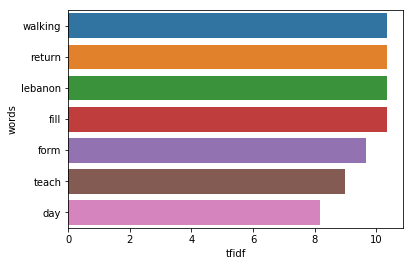

In [35]:
topvacab = tf1.sort_values(by='tfidf',ascending=False)
top_vacab = topvacab.head(20)
sns.barplot(x='tfidf',y='words', data=top_vacab)

# Barplot of Important words against tf,idf,tf-idf

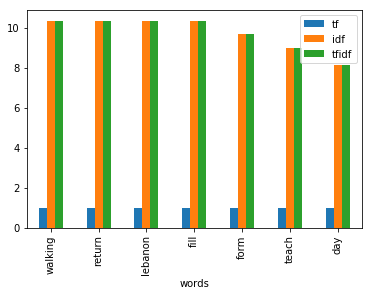

In [37]:
top_vacab.plot(x ='words', kind='bar') 

# Sentiment Analysis
Classifies texts based on the sentiment they represent .

In [41]:
smsData['sentiment'] = smsData['text'].apply(lambda x: TextBlob(str(x)).sentiment[0] )
sentiment = smsData[['text','sentiment']]

sentiment.head()

,text,sentiment
0,teacher mummy want buy box moon cake want set ...,0.000000
1,return lebanon teach fill form walking day,0.000000
2,tonight fat family meal want shrink half hour ...,-0.083333
3,stop saturday night play mahjong something drink,0.000000
4,resting exam tomorrow,0.000000


In [42]:
pos_texts = [ text for index, text in enumerate(smsData['text']) if smsData['sentiment'][index] > 0]
neu_texts = [ text for index, text in enumerate(smsData['text']) if smsData['sentiment'][index] == 0]
neg_texts = [ text for index, text in enumerate(smsData['text']) if smsData['sentiment'][index] < 0]

possitive_percent = len(pos_texts)*100/len(smsData['text'])
neutral_percent = len(neu_texts)*100/len(smsData['text'])
negative_percent = len(neg_texts)*100/len(smsData['text'])

# Pie Chart of Sentiment Analysis

[0.0730970920069919, 99.8569839504211, 0.06991895757190529]

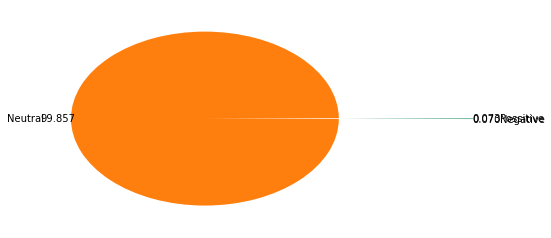

In [46]:
percent_values = [possitive_percent, neutral_percent, negative_percent]
labels = 'Possitive', 'Neutral', 'Negative'
explode = (0.5, 0.5, 0.5)

plt.pie(percent_values, explode=explode, labels=labels, autopct='%1.3f', pctdistance=1.1, labeldistance=1.2)
percent_values

# Word Cloud

# Word Cloud of possitive texts

(-0.5, 999.5, 499.5, -0.5)

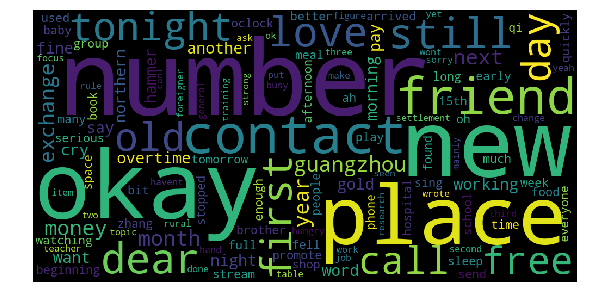

In [47]:
k= (' '.join(pos_texts))

wordcloud = WordCloud(width = 1000, height = 500).generate(k)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

# Wordcloud of neutral texts

(-0.5, 999.5, 499.5, -0.5)

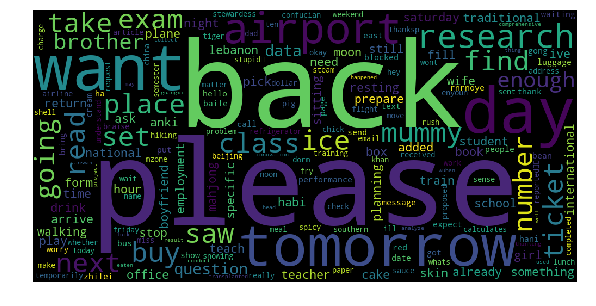

In [48]:
k= (' '.join(neu_texts))

wordcloud = WordCloud(width = 1000, height = 500).generate(k)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

# Word Cloud of Negative texts

(-0.5, 999.5, 499.5, -0.5)

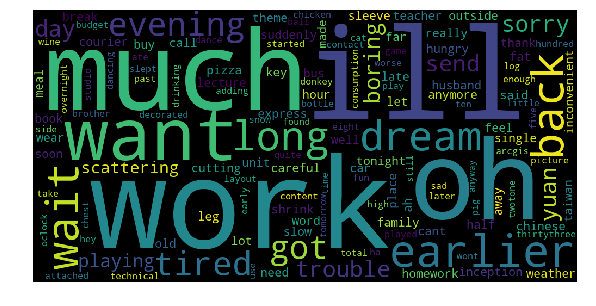

In [49]:
k= (' '.join(neg_texts))

wordcloud = WordCloud(width = 1000, height = 500).generate(k)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')